In [416]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
from datetime import datetime
import pandas_datareader as data
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [417]:
symbol = 'MU'
url = f'https://finance.yahoo.com/quote/{symbol}/history'
url

'https://finance.yahoo.com/quote/MU/history'

In [418]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.43'}
response = requests.get(url, headers = headers)
response

<Response [200]>

In [242]:
soup = BeautifulSoup(response.text, 'html.parser')

In [419]:
import pandas as pd
data = []
table = soup.find('table', {'class': 'W(100%) M(0)'})
if table:
    rows = table.find_all('tr', {'class': 'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
    if rows:
        for row in rows:
            date = row.find_all('td')[0].text
            open_price = row.find_all('td')[1].text
            # Check if open_price contains 'dividend'
            if 'dividend' in open_price.lower():
                # If 'dividend' is present, mark all corresponding values as 'NA'
                open_price, high_price, low_price, close_price, adj_close_price, volume = 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'
            else:
                # Extract other values if open_price is not 'dividend'
                high_price = row.find_all('td')[2].text
                low_price = row.find_all('td')[3].text
                close_price = row.find_all('td')[4].text
                adj_close_price = row.find_all('td')[5].text
                volume = row.find_all('td')[6].text

                # Append the extracted data to the list as a dictionary
                data.append({'date':date,
                             'Open': open_price,
                             'High': high_price,
                             'Low': low_price,
                             'Close': close_price,
                             'Adj Close': adj_close_price,
                             'Volume': volume})


df = pd.DataFrame(data)
print(df)


            date   Open   High    Low  Close Adj Close      Volume
0   Oct 25, 2023  68.49  69.20  66.93  66.96     66.96   4,989,140
1   Oct 24, 2023  67.29  68.35  67.13  68.07     68.07   8,448,900
2   Oct 23, 2023  66.82  68.16  66.23  66.88     66.88   9,762,000
3   Oct 20, 2023  67.56  68.52  67.14  67.22     67.22  11,501,700
4   Oct 19, 2023  69.68  69.78  67.18  67.53     67.53  18,111,000
..           ...    ...    ...    ...    ...       ...         ...
93  Jun 13, 2023  68.56  68.88  67.60  67.87     67.63  11,911,900
94  Jun 12, 2023  65.84  67.54  65.79  67.45     67.21  14,731,100
95  Jun 09, 2023  65.93  66.40  64.47  65.43     65.20  14,649,300
96  Jun 08, 2023  66.50  66.52  64.01  65.32     65.09  25,856,800
97  Jun 07, 2023  68.41  68.67  66.94  67.06     66.82  14,610,800

[98 rows x 7 columns]


In [420]:
def str_to_datetime(s):
    split = s.split(' ')
    month,day,year = split[0],split[1],int(split[2])
    d = day.split(',')
    day = int(d[0])
    dic = {'Jun':6,'Jan':1,'Dec':12,'May':5,'Jul':7,'Feb':2,'Apr':4,'Mar':3,'Aug':8,'Sep':9,'Nov':11,'Oct':10}
    return datetime.datetime(year = year, month = dic[month], day = day)

In [421]:
df['date'] = df['date'].apply(str_to_datetime)

In [422]:
df

,date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-25,68.49,69.20,66.93,66.96,66.96,"4,989,140"
1,2023-10-24,67.29,68.35,67.13,68.07,68.07,"8,448,900"
2,2023-10-23,66.82,68.16,66.23,66.88,66.88,"9,762,000"
3,2023-10-20,67.56,68.52,67.14,67.22,67.22,"11,501,700"
4,2023-10-19,69.68,69.78,67.18,67.53,67.53,"18,111,000"
...,...,...,...,...,...,...,...
93,2023-06-13,68.56,68.88,67.60,67.87,67.63,"11,911,900"
94,2023-06-12,65.84,67.54,65.79,67.45,67.21,"14,731,100"
95,2023-06-09,65.93,66.40,64.47,65.43,65.20,"14,649,300"
96,2023-06-08,66.50,66.52,64.01,65.32,65.09,"25,856,800"


TypeError: list indices must be integers or slices, not str

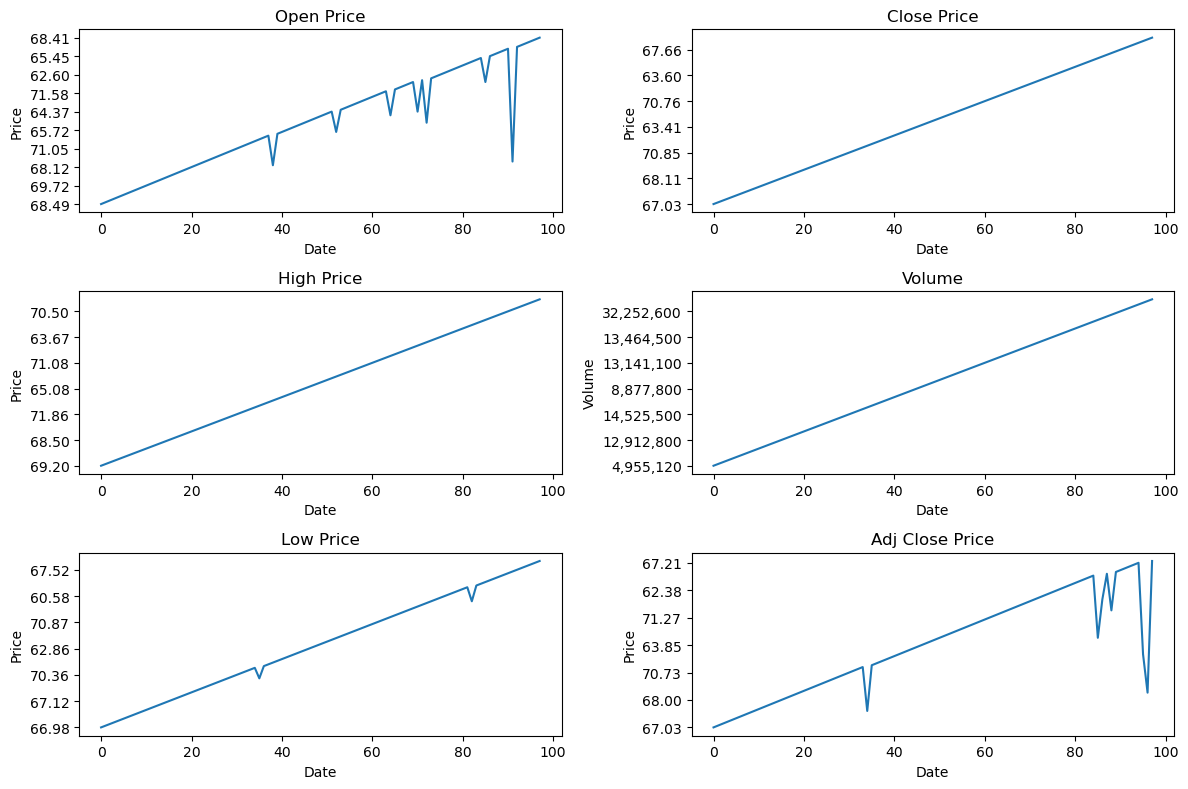

In [230]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

axes[0, 0].plot(df.index, df['Open'])
axes[0, 0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0, 0].set_title('Open Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')

axes[0, 1].plot(df.index, df['Close'])
axes[0, 1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0, 1].set_title('Close Price')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')

axes[1, 0].plot(df.index, df['High'])
axes[1, 0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1, 0].set_title('High Price')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')

axes[1, 1].plot(df.index, df['Volume'])
axes[1, 1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1, 1].set_title('Volume')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volume')

axes[2, 0].plot(df.index, df['Low'])
axes[2, 0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[2, 0].set_title('Low Price')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Price')

axes[2, 1].plot(df.index, df['Adj Close'])
axes[2, 1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[2, 1].set_title('Adj Close Price')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Price')


plt.tight_layout()

plt.show()


In [12]:
maC3 = df.Close.rolling(3).mean()
maC3

date
2023-10-25          NaN
2023-10-24          NaN
2023-10-23    67.636667
2023-10-20    67.390000
2023-10-19    67.210000
                ...    
2023-06-13    68.603333
2023-06-12    68.146667
2023-06-09    66.916667
2023-06-08    66.066667
2023-06-07    65.936667
Name: Close, Length: 98, dtype: float64

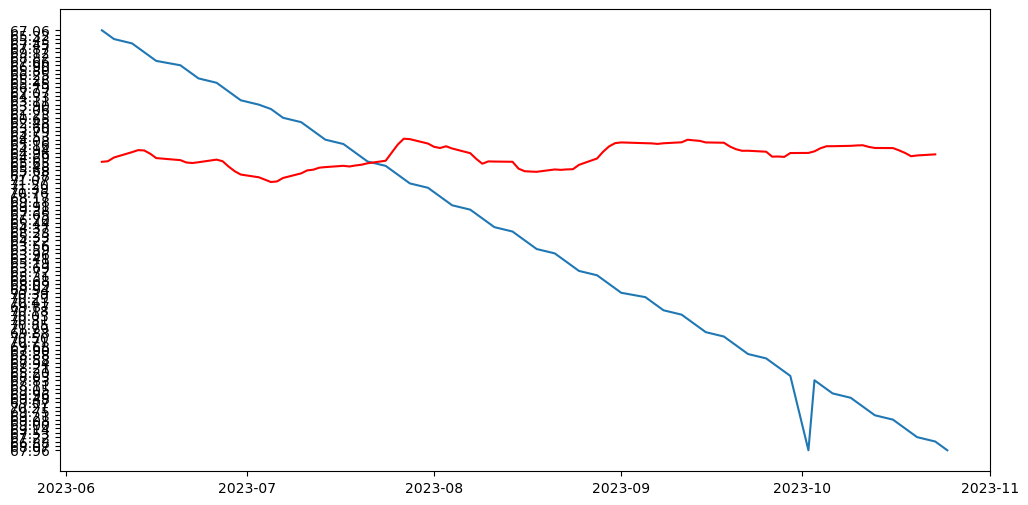

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(maC3,'r')

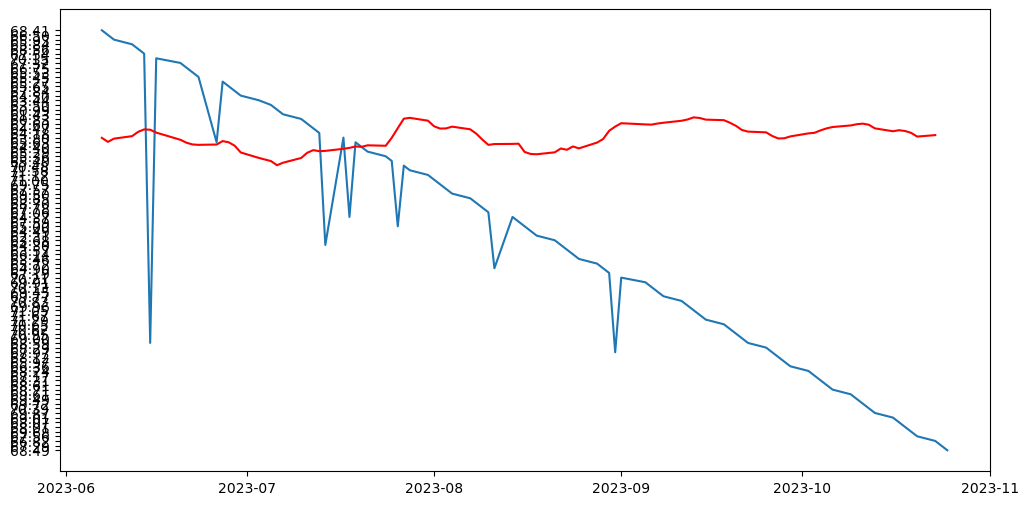

In [14]:
maO3 = df.Open.rolling(3).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Open)
plt.plot(maO3,'r')

In [247]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

In [252]:
data_training = pd.DataFrame(df['Close'][0:int(len(data)*0.70)])

In [253]:
data_testing = pd.DataFrame(df['Close'][int(len(data)*0.70) : int(len(df))])

In [254]:
scaler = MinMaxScaler(feature_range=(0,1))

In [255]:
data_training_array = scaler.fit_transform(data_training)

In [256]:
data_training_array

array([[0.42362768],
       [0.55608592],
       [0.41408115],
       [0.45465394],
       [0.49164678],
       [0.68377088],
       [0.66706444],
       [0.67661098],
       [0.69212411],
       [0.75656325],
       [0.81145585],
       [0.67541766],
       [0.72434368],
       [0.78162291],
       [0.67303103],
       [0.56085919],
       [0.5274463 ],
       [0.54295943],
       [0.55131265],
       [0.21360382],
       [0.57279236],
       [0.54057279],
       [0.61694511],
       [0.65274463],
       [0.53579952],
       [0.74821002],
       [0.87112172],
       [0.84606205],
       [0.77207637],
       [1.        ],
       [0.88782816],
       [0.82338902],
       [0.78997613],
       [0.80787589],
       [0.77088305],
       [0.8353222 ],
       [0.82100239],
       [0.83293556],
       [0.77923628],
       [0.55847255],
       [0.3902148 ],
       [0.22673031],
       [0.03699284],
       [0.03341289],
       [0.2124105 ],
       [0.        ],
       [0.06563246],
       [0.021

In [362]:
x_train = []
y_train = []

for i in range(4,data_training_array.shape[0]):
    x_train.append(data_training_array[i-4:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [363]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [400]:
model = Sequential()
model.add(LSTM(units=100,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=160,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [401]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 4, 100)            40800     
                                                                 
 dropout_84 (Dropout)        (None, 4, 100)            0         
                                                                 
 lstm_85 (LSTM)              (None, 4, 120)            106080    
                                                                 
 dropout_85 (Dropout)        (None, 4, 120)            0         
                                                                 
 lstm_86 (LSTM)              (None, 4, 160)            179840    
                                                                 
 dropout_86 (Dropout)        (None, 4, 160)            0         
                                                                 
 lstm_87 (LSTM)              (None, 200)             

In [402]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 150,batch_size =32)

Epoch 1/150
2/2 [==============================] - 4s 22ms/step - loss: 0.3882
Epoch 2/150
2/2 [==============================] - 0s 19ms/step - loss: 0.3689
Epoch 3/150
2/2 [==============================] - 0s 16ms/step - loss: 0.3454
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.3115
Epoch 5/150
2/2 [==============================] - 0s 16ms/step - loss: 0.2739
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.2199
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1591
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1012
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0675
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1023
Epoch 11/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0981
Epoch 12/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0894
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 13ms/step - loss: 0.0395
Epoch 104/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0396
Epoch 105/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0493
Epoch 106/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0399
Epoch 107/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0449
Epoch 108/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0424
Epoch 109/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0473
Epoch 110/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0436
Epoch 111/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0446
Epoch 112/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0420
Epoch 113/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0438
Epoch 114/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0372
Epoch 115/150
2/2 [=======================

In [403]:
model.save('keras_model.h5')

C:\Users\Smilika\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [404]:
data_testing.head()

,Close
68,64.69
69,64.96
70,64.94
71,65.16
72,64.08


In [405]:
past_3_days = data_training.tail(4) 

In [406]:
past_3_days

,Close
64,67.38
65,65.68
66,65.48
67,65.65


In [407]:
final_df = pd.concat([past_3_days, data_testing], ignore_index=True)

In [408]:
final_df

,Close
0,67.38
1,65.68
2,65.48
3,65.65
4,64.69
5,64.96
6,64.94
7,65.16
8,64.08
9,64.53


In [409]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.79456907],
       [0.59386068],
       [0.57024793],
       [0.59031877],
       [0.47697757],
       [0.50885478],
       [0.50649351],
       [0.53246753],
       [0.40495868],
       [0.45808737],
       [0.37072019],
       [0.34828808],
       [0.21605667],
       [0.        ],
       [0.06847698],
       [0.16646989],
       [0.3837072 ],
       [0.29043684],
       [0.43447462],
       [0.7579693 ],
       [0.72491145],
       [0.56670602],
       [0.54663518],
       [0.66115702],
       [0.60802834],
       [0.73789847],
       [0.82762692],
       [0.96458087],
       [1.        ],
       [0.85242031],
       [0.80283353],
       [0.56434475],
       [0.55135773],
       [0.75678867]])

In [410]:
x_train_val = []
y_train_val = []

for i in range(4,input_data.shape[0]):
    x_train_val.append(input_data[i-4:i])
    y_train_val.append(input_data[i,0])
x_train_val,y_train_val = np.array(x_train_val), np.array(y_train_val)

In [411]:
y_predicted.shape

(30, 1)

In [412]:
y_predicted = model.predict(x_train_val)

1/1 [==============================] - 1s 514ms/step


In [413]:
scaler.scale_

array([0.11806375])

In [414]:
scale_fact = 1/0.11806375
y_predicted = y_predicted *scale_fact
y_train_val = y_train_val*scale_fact

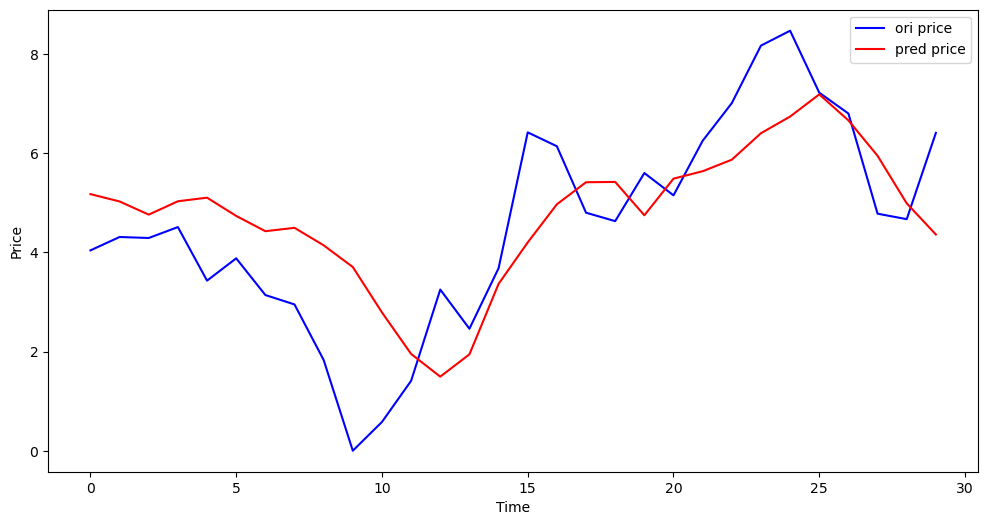

In [415]:
plt.figure(figsize=(12,6))
plt.plot(y_train_val,'b',label = 'ori price')
plt.plot(y_predicted,'r',label = 'pred price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()